In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from pathlib import Path
import h5py
import os
import sys

sys.path.append(os.getcwd() + '/../..')
sys.path.append(os.getcwd() + '/..')
from filepaths import filepath_from_ml_artifacts_uri
from analysis.iclr.plotting import settings, fig_size, cb_line_cycler, cb_line_cycler_solid, cb_marker_cycler, savefig
from plot_hdf5_dataset import plot_dataset
from iclr_paper_path import get_paper_path
import matplotlib
settings()
import matplotlib.pyplot as plt

finding path that contains "code", then going up one level to find "LaTeX"
e:\projects\balanced_neural_odes_internal\code\python\analysis\iclr
e:\projects\balanced_neural_odes_internal\code\python\analysis
e:\projects\balanced_neural_odes_internal\code\python
e:\projects\balanced_neural_odes_internal\code
e:\projects\balanced_neural_odes_internal
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\NODE\vector_field.png
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\NODE\vector_field.svg


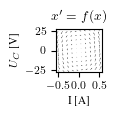

In [15]:
def sr_ode(x):
    # compute the right-hand side of the ODE for a RCL circuit
    # x[0] is I
    # x[1] is U_C
    L = 0.1/(2*np.pi)
    R = 0.5
    C = 0.001/(2*np.pi)
    I = x[0]
    U_C = x[1]

    dI = (-U_C - R*I)/L
    d_U_C = I/C
    return np.array([dI, d_U_C])

# set font size to 8
plt.rcParams.update({'font.size': 8})

# calculate the vector field
k = 0.5
n = 10
I = np.linspace(-k, k, n)
U_C = np.linspace(-50*k, 50*k, n)
I, U_C = np.meshgrid(I, U_C)
dI = np.zeros_like(I)
d_U_C = np.zeros_like(U_C)
for i in range(n):
    for j in range(n):
        x = np.array([I[i, j], U_C[i, j]])
        dx = sr_ode(x)
        dI[i, j] = dx[0]
        d_U_C[i, j] = dx[1]

# plot the vector field
_scale = 0.55
fig, ax = plt.subplots(1,1, figsize=fig_size(_scale*2.2,_scale*2.2), tight_layout=True)
ax.quiver(I, U_C, dI, d_U_C, color='black')
# color by norm
# norm = np.sqrt(dI**2 + d_U_C**2)
# ax.imshow(norm, extent=[-k, k, -40*k, 40*k], origin='lower', cmap='RdBu', alpha=0.5, aspect='auto', interpolation='bilinear')
ax.set_xlabel('I [A]')
ax.set_ylabel('$U_C$ [V]')
# set title
ax.set_title(r'$x' +'\'' + '=f(x)$')
savefig(fig, get_paper_path('NODE', 'vector_field'))